In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath(os.path.join('', os.pardir)))
analysis_dir = os.path.abspath(os.path.join('', os.pardir))
sys.path.insert(0, os.path.abspath(os.path.join(analysis_dir, os.pardir)))
from utils.misc import read_json_file
from src.ml.helper.utils import parse_traces_config

analysis_dir = os.path.abspath(os.path.join('', os.pardir))
root_dir = os.path.abspath(os.path.join(analysis_dir, os.pardir))
path_to_plot_dir = "/home/lorenzo/Desktop/mimic-2/analysis/plots/thruput_vs_rtt"

ml_dir: /home/lorenzo/Desktop/mimic-2/src/ml | src_dir: /home/lorenzo/Desktop/mimic-2/src | entry_dir: /home/lorenzo/Desktop/mimic-2 




In [36]:
mimic_exp_json = {
        "traces":[
        {   "model_name": "bootstrapped_ucb.2023.04.19.09.08.39",
            "path": "/home/lorenzo/Desktop/mimic-2/log/mab/trace/att.lte.driving.bootstrapped_ucb.2023.04.20.15.22.57.csv",
            "timestamp": "2023.04.20.15.22.57",
            "trace_name": "att.lte.driving.bootstrapped_ucb.2023.04.20.15.22.57.csv"
        },
        {
            "model_name": "bootstrapped_ucb.2023.04.19.09.08.39",
            "path": "/home/lorenzo/Desktop/mimic-2/log/mab/trace/att.lte.driving.2016.bootstrapped_ucb.2023.04.22.14.29.49.csv",
            "timestamp": "2023.04.22.14.29.49",
            "trace_name": "att.lte.driving.2016.bootstrapped_ucb.2023.04.22.14.29.49.csv"
        },
        {
            "model_name": "bootstrapped_ucb.2023.04.19.09.08.39",
            "path": "/home/lorenzo/Desktop/mimic-2/log/mab/trace/tm.lte.driving.bootstrapped_ucb.2023.04.22.14.30.52.csv",
            "timestamp": "2023.04.22.14.30.52",
            "trace_name": "tm.lte.driving.bootstrapped_ucb.2023.04.22.14.30.52.csv"
        },
        {
            "model_name": "bootstrapped_ucb.2023.04.19.09.08.39",
            "path": "/home/lorenzo/Desktop/mimic-2/log/mab/trace/tm.lte.short.bootstrapped_ucb.2023.04.22.14.31.56.csv",
            "timestamp": "2023.04.22.14.31.56",
            "trace_name": "tm.lte.short.bootstrapped_ucb.2023.04.22.14.31.56.csv"
        },
        {
            "model_name": "bootstrapped_ucb.2023.04.19.09.08.39",
            "path": "/home/lorenzo/Desktop/mimic-2/log/mab/trace/tm.umts.driving.bootstrapped_ucb.2023.04.22.14.33.00.csv",
            "timestamp": "2023.04.22.14.33.00",
            "trace_name": "tm.umts.driving.bootstrapped_ucb.2023.04.22.14.33.00.csv"
        },
        {
            "model_name": "bootstrapped_ucb.2023.04.19.09.08.39",
            "path": "/home/lorenzo/Desktop/mimic-2/log/mab/trace/vz.evdo.driving.bootstrapped_ucb.2023.04.22.14.34.09.csv",
            "timestamp": "2023.04.22.14.34.09",
            "trace_name": "vz.evdo.driving.bootstrapped_ucb.2023.04.22.14.34.09.csv"
        },
        {
            "model_name": "bootstrapped_ucb.2023.04.19.09.08.39",
            "path": "/home/lorenzo/Desktop/mimic-2/log/mab/trace/vz.lte.driving.bootstrapped_ucb.2023.04.22.14.35.17.csv",
            "timestamp": "2023.04.22.14.35.17",
            "trace_name": "vz.lte.driving.bootstrapped_ucb.2023.04.22.14.35.17.csv"
        },
        {
            "model_name": "bootstrapped_ucb.2023.04.19.09.08.39",
            "path": "/home/lorenzo/Desktop/mimic-2/log/mab/trace/vz.lte.short.bootstrapped_ucb.2023.04.22.14.36.22.csv",
            "timestamp": "2023.04.22.14.36.22",
            "trace_name": "vz.lte.short.bootstrapped_ucb.2023.04.22.14.36.22.csv"
        },
        {
            "model_name": "bootstrapped_ucb.2023.04.19.09.08.39",
            "path": "/home/lorenzo/Desktop/mimic-2/log/mab/trace/bus.bootstrapped_ucb.2023.04.22.14.37.25.csv",
            "timestamp": "2023.04.22.14.37.25",
            "trace_name": "bus.bootstrapped_ucb.2023.04.22.14.37.25.csv"
        },
        {
            "model_name": "bootstrapped_ucb.2023.04.19.09.08.39",
            "path": "/home/lorenzo/Desktop/mimic-2/log/mab/trace/timessquare.bootstrapped_ucb.2023.04.22.14.38.27.csv",
            "timestamp": "2023.04.22.14.38.27",
            "trace_name": "timessquare.bootstrapped_ucb.2023.04.22.14.38.27.csv"
        },
        {
            "model_name": "bootstrapped_ucb.2023.04.19.09.08.39",
            "path": "/home/lorenzo/Desktop/mimic-2/log/mab/trace/wired.bootstrapped_ucb.2023.04.22.14.39.30.csv",
            "timestamp": "2023.04.22.14.39.30",
            "trace_name": "wired.bootstrapped_ucb.2023.04.22.14.39.30.csv"
        }
        ]
}

In [34]:
# Get config

# Select policy
policy = "bootstrapped_ucb"

log_dir_path = os.path.join(root_dir, 'log')
iperf_test_dir_path = os.path.join(log_dir_path, 'iperf')
mab_dir_path = os.path.join(log_dir_path, 'mab', 'config')
config_file_name = policy + '.json'
file_path = os.path.join(mab_dir_path, config_file_name)
config = read_json_file(file_path)

# Get model timestamp
# model_name = config["models"][0]['name']
# model_ts = '.'.join(model_name.split('.')[1:])
# model_ts
# Get most recent model timestamp
# model_names = [model['name'] for model in config['models']]
# model_names.sort(reverse=True)
# model_ts = '.'.join(model_names[0].split('.')[1:])
# model_ts

In [3]:
# Read trace names and paths from YAML file
trace_data = parse_traces_config()
traces = [t for t in trace_data['traces'].keys()]
traces

['att.lte.driving',
 'att.lte.driving.2016',
 'tm.lte.driving',
 'tm.lte.short',
 'tm.umts.driving',
 'vz.evdo.driving',
 'vz.lte.driving',
 'vz.lte.short',
 'bus',
 'timessquare',
 'wired']

In [44]:
import re
from datetime import datetime

# # Get iperf config
# def get_config(tag):
#     iperf_test_dir_path = os.path.join(log_dir_path, 'iperf')
#     ts_list = []
#     latest_timestamp = None
#     mimic_config_file = None

#     for config_file in os.listdir(iperf_test_dir_path):
#         if config_file.startswith(tag):
#             full_path = os.path.join(iperf_test_dir_path, config_file)
#             # print(config_file)
#             pattern = r"\d{4}\.\d{2}\.\d{2}\.\d{2}\.\d{2}\.\d{2}"
#             match = re.search(pattern, config_file)
#             if not match:
#                 continue
#             timestamp_str = match.group(0)
#             timestamp = datetime.strptime(timestamp_str, "%Y.%m.%d.%H.%M.%S")
#             ts_list.append(timestamp)
#             # check if this timestamp is more recent
#             if latest_timestamp is None or timestamp > latest_timestamp:
#                 latest_timestamp = timestamp
#                 mimic_config_file = full_path
#     print(mimic_config_file)
#     return mimic_config_file

def get_config(trace_name):
    trace_dict = mimic_exp_json["traces"]
    for item in trace_dict:
        if item["trace_name"].startswith(trace_name):
            if trace_name == "att.lte.driving" and item["trace_name"].startswith("att.lte.driving.2016"):
                continue
            if trace_name == "att.lte.driving.2016" and "2016" not in item["trace_name"]:
                continue
            return item["trace_name"].replace("csv", "json")
        
def get_prot_config(prot, trace_name):
    config_path = os.path.join(mab_dir_path, prot + ".json")
    config = read_json_file(config_path)
    for item in config["traces"]:
        if item["trace_name"].startswith(trace_name):
            if trace_name == "att.lte.driving" and item["trace_name"].startswith("att.lte.driving.2016"):
                continue
            if trace_name == "att.lte.driving.2016" and "2016" not in item["trace_name"]:
                continue
            return item["trace_name"].replace("csv", "json")
        
def get_metrics(config):
    rtts = []
    cwnds = [] 
    s_rate = []
    for intervals in config['intervals']:
        s_rate.append(intervals['streams'][0]['bits_per_second']*10**(-6))
        cwnds.append(intervals['streams'][0]['snd_cwnd'])
        rtts.append(intervals['streams'][0]['rtt']*10**(-3))
    thruput = config["end"]["streams"][0]["receiver"]["bits_per_second"]*10**(-6)
    return thruput, rtts, cwnds, s_rate


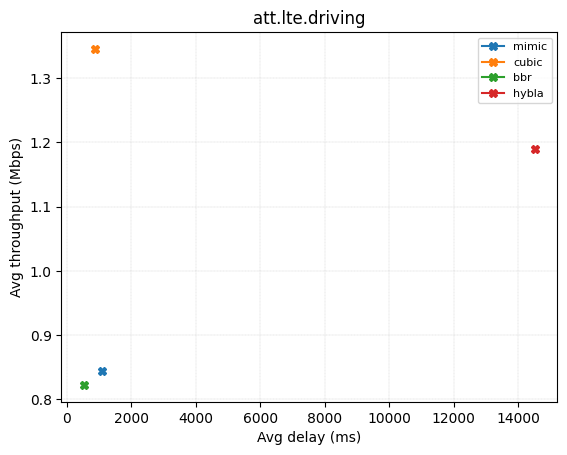

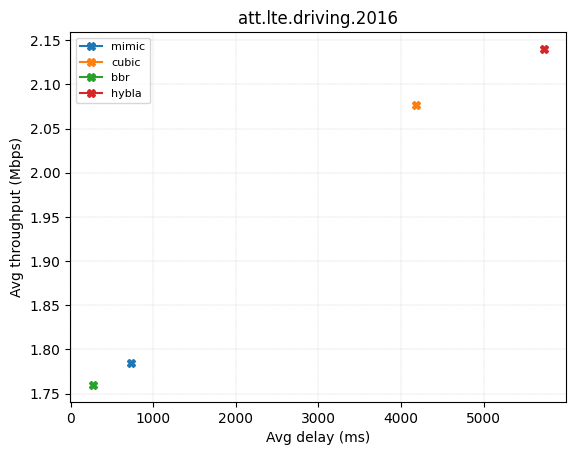

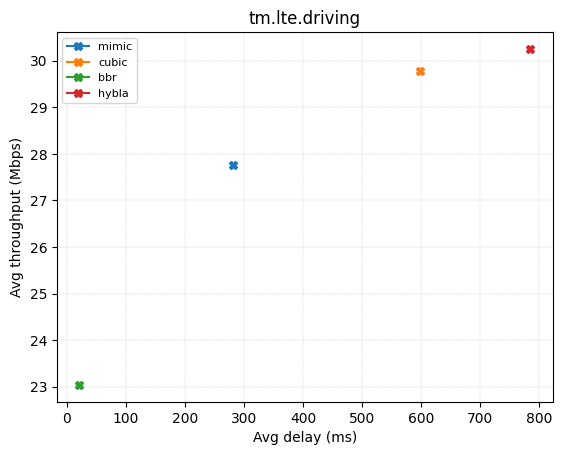

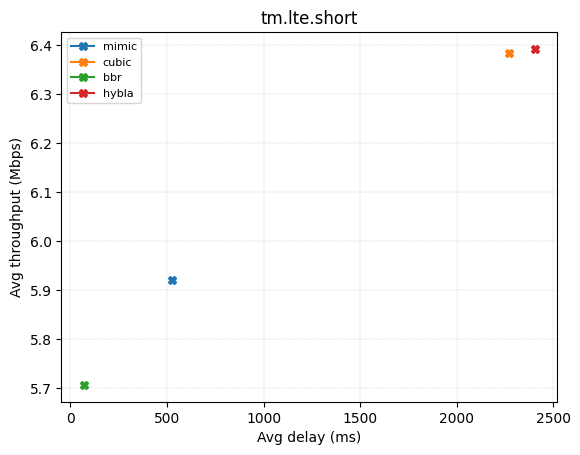

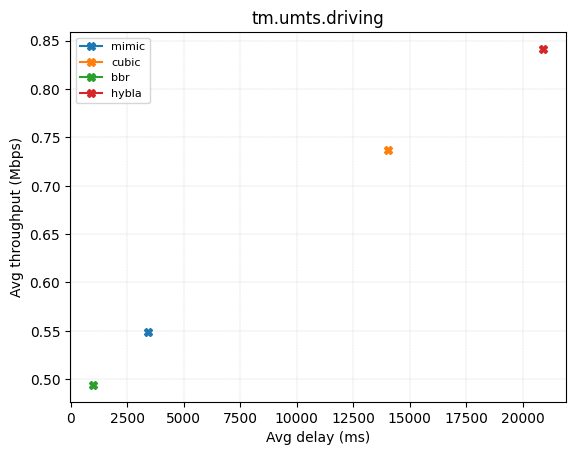

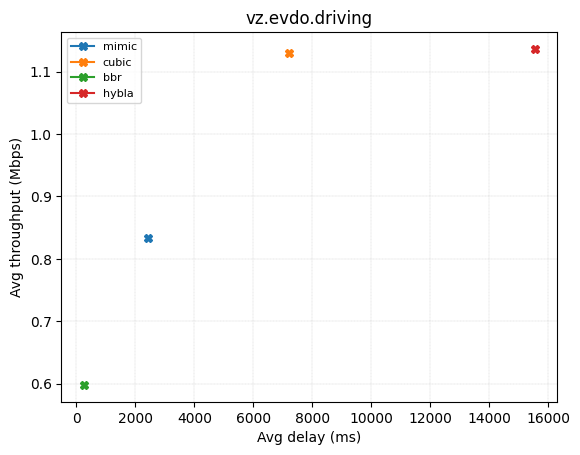

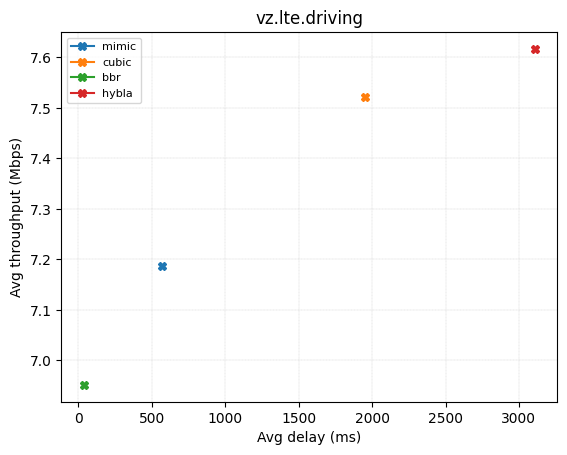

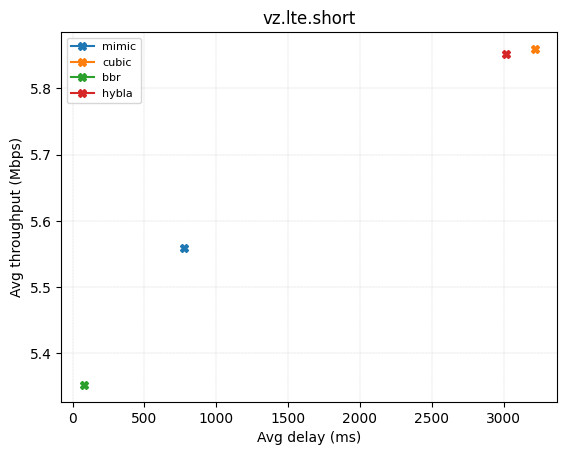

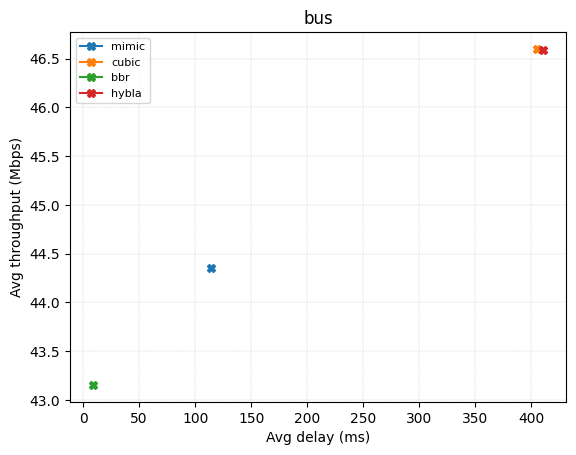

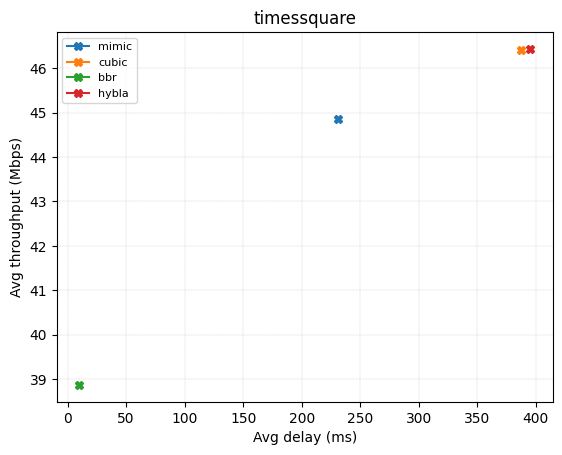

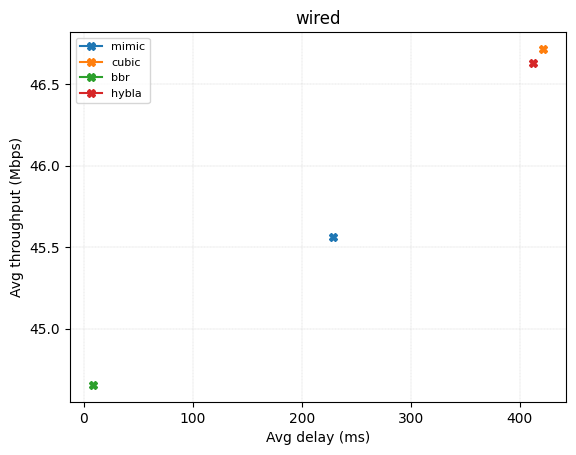

In [49]:
save = True
import matplotlib.pyplot as plt
import numpy as np
for trace in traces:

    # Get mimic config
    mimic_config = read_json_file(os.path.join(iperf_test_dir_path, get_config(trace)))

    # Get native prot config
    cubic_config = read_json_file(os.path.join(iperf_test_dir_path, get_prot_config("cubic", trace)))
    bbr_config = read_json_file(os.path.join(iperf_test_dir_path, get_prot_config("bbr", trace)))
    hybla_config = read_json_file(os.path.join(iperf_test_dir_path, get_prot_config("hybla", trace)))
    # random_config = read_json_file(get_config(f"{trace}.random_policy"))

    # Get metrics
    mimic_metrics_receiver = mimic_config['end']['streams'][0]['receiver']
    cubic_metrics_receiver = cubic_config['end']['streams'][0]['receiver']
    bbr_metrics_receiver = bbr_config['end']['streams'][0]['receiver']
    hybla_metrics_receiver = hybla_config['end']['streams'][0]['receiver']
    # random_metrics_receiver = random_config['end']['streams'][0]['receiver']

    mimic_metrics_sender = mimic_config['end']['streams'][0]['sender']
    cubic_metrics_sender = cubic_config['end']['streams'][0]['sender']
    bbr_metrics_sender = bbr_config['end']['streams'][0]['sender']
    hybla_metrics_sender = hybla_config['end']['streams'][0]['sender']
    # random_metrics_sender = random_config['end']['streams'][0]['sender']

    #  Get latency
    # mimic_mean_rtt = mimic_metrics_sender['mean_rtt']
    # cubic_mean_rtt = cubic_metrics_sender['mean_rtt']
    # bbr_mean_rtt = bbr_metrics_sender['mean_rtt']
    # hybla_mean_rtt = hybla_metrics_sender['mean_rtt']
    # random_min_rtt = random_metrics_sender['mean_rtt']
    mimic_thruput, mimic_rtts, _, _ = get_metrics(mimic_config)
    cubic_thruput, cubic_rtts, _, _ = get_metrics(cubic_config)
    bbr_thruput, bbr_rtts, _, _ = get_metrics(bbr_config)
    hybla_thruput, hybla_rtts, _, _ = get_metrics(hybla_config)

    mimic_delay_95_perc = np.percentile(mimic_rtts, 95)
    cubic_delay_95_perc = np.percentile(cubic_rtts, 95)
    bbr_delay_95_perc = np.percentile(bbr_rtts, 95)
    hybla_delay_95_perc = np.percentile(hybla_rtts, 95)

    mimic_delay_95_perc = np.mean(mimic_rtts)
    cubic_delay_95_perc = np.mean(cubic_rtts)
    bbr_delay_95_perc = np.mean(bbr_rtts)
    hybla_delay_95_perc = np.mean(hybla_rtts)

    # random_thruput = random_metrics_receiver['bits_per_second']*10**(-6)

    # Plot
    fig, ax = plt.subplots()
    ax.plot(mimic_delay_95_perc, mimic_thruput, marker='X', label=f'mimic')
    # ax.plot(random_min_rtt, random_thruput, marker='o', label='mimic-random')
    ax.plot(cubic_delay_95_perc, cubic_thruput, marker='X', label='cubic')
    ax.plot(bbr_delay_95_perc, bbr_thruput, marker='X', label='bbr')
    ax.plot(hybla_delay_95_perc, hybla_thruput, marker='X', label='hybla')

    # set axis labels and legend
    ax.set_title(trace)
    ax.set_xlabel('Avg delay (ms)', fontsize=10)
    ax.set_ylabel('Avg throughput (Mbps)', fontsize=10)
    ax.legend(fontsize=8)
    plt.grid(linestyle='--', linewidth=0.2)

    if save:
        filename = f"mab.{policy}.{trace}.thruput_vs_avg_delay.png"
        plt.savefig(os.path.join(path_to_plot_dir, filename))

    # show plot
    plt.show()
